In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

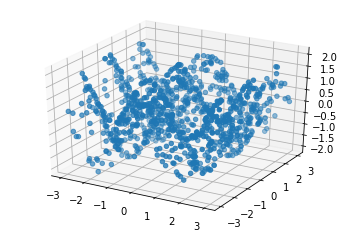

In [4]:
#plotting the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)

In [9]:
#bulding the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape = (2,),activation='relu'),
    tf.keras.layers.Dense(1)
])

In [10]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(loss='mse',optimizer=opt)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 42, test_size=0.2)

In [23]:
hist = model.fit(X_train,y_train,
                validation_data=(X_test,y_test),epochs=90)

Train on 800 samples, validate on 200 samples
Epoch 1/90
800/800 [==============================] - 0s 136us/sample - loss: 0.6472 - val_loss: 0.6040
Epoch 2/90
800/800 [==============================] - 0s 116us/sample - loss: 0.5737 - val_loss: 0.5748
Epoch 3/90
800/800 [==============================] - 0s 127us/sample - loss: 0.6053 - val_loss: 0.5531
Epoch 4/90
800/800 [==============================] - 0s 135us/sample - loss: 0.5724 - val_loss: 0.5125
Epoch 5/90
800/800 [==============================] - 0s 132us/sample - loss: 0.5134 - val_loss: 0.6314
Epoch 6/90
800/800 [==============================] - 0s 129us/sample - loss: 0.5383 - val_loss: 0.5688
Epoch 7/90
800/800 [==============================] - 0s 122us/sample - loss: 0.5345 - val_loss: 0.5786
Epoch 8/90
800/800 [==============================] - 0s 129us/sample - loss: 0.5284 - val_loss: 0.5299
Epoch 9/90
800/800 [==============================] - 0s 129us/sample - loss: 0.4816 - val_loss: 0.5601
Epoch 10/90
800/80

800/800 [==============================] - 0s 127us/sample - loss: 0.0348 - val_loss: 0.0209
Epoch 79/90
800/800 [==============================] - 0s 114us/sample - loss: 0.0171 - val_loss: 0.0080
Epoch 80/90
800/800 [==============================] - 0s 123us/sample - loss: 0.0125 - val_loss: 0.0122
Epoch 81/90
800/800 [==============================] - 0s 137us/sample - loss: 0.0117 - val_loss: 0.0091
Epoch 82/90
800/800 [==============================] - 0s 120us/sample - loss: 0.0095 - val_loss: 0.0096
Epoch 83/90
800/800 [==============================] - 0s 108us/sample - loss: 0.0097 - val_loss: 0.0070
Epoch 84/90
800/800 [==============================] - 0s 111us/sample - loss: 0.0069 - val_loss: 0.0071
Epoch 85/90
800/800 [==============================] - 0s 102us/sample - loss: 0.0066 - val_loss: 0.0128
Epoch 86/90
800/800 [==============================] - 0s 114us/sample - loss: 0.0095 - val_loss: 0.0124
Epoch 87/90
800/800 [==============================] - 0s 179us/sam

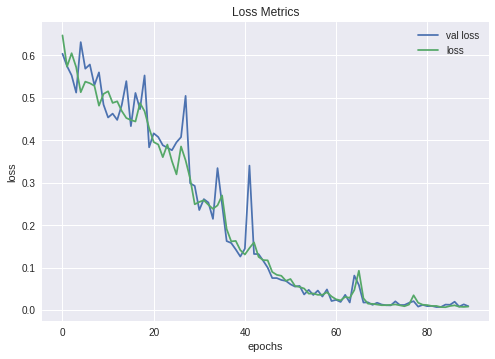

In [24]:
plt.style.use('seaborn')
plt.plot(hist.history['val_loss'],label="val loss")
plt.plot(hist.history['loss'],label="loss")
plt.title("Loss Metrics")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [26]:
#finding r squared value
y_pred = model.predict(X_test)

In [33]:
ss_res = y_test - y_pred
ss_tot = y_test - y_test.mean()
r_2 = 1 - np.dot(ss_res,ss_res)/np.dot(ss_tot,ss_tot)
print("R squared value:",r_2)

R squared value: [[3.04713979 1.14503849 1.0501989  ... 0.93781572 2.61526928 2.02875909]
 [1.20330438 2.58994337 2.6590818  ... 2.74100955 1.5181396  1.94570774]
 [1.2154621  2.58041609 2.64847329 ... 2.72911981 1.52537376 1.94625535]
 ...
 [1.10235214 2.66905368 2.7471701  ... 2.83973662 1.45807041 1.94116057]
 [2.8365034  1.31010179 1.23399474 ... 1.14380929 2.48993519 2.01927146]
 [2.160266   1.84002909 1.82406194 ... 1.80514116 2.08755647 1.98881189]]


In [42]:
y_prednew = y_pred.reshape(200)

In [43]:
ss_res = y_test - y_prednew
ss_tot = y_test - y_test.mean()
r_2 = 1 - np.dot(ss_res,ss_res)/np.dot(ss_tot,ss_tot)
print("R squared value:",r_2)

R squared value: 0.9906992861724604


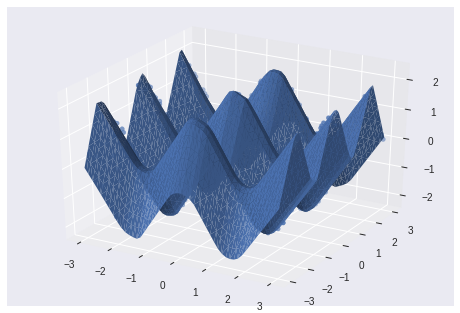

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X_train[:,0],X_train[:,1],y_train)

#surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,
               linewidth=0.2)

In [55]:
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T

In [59]:
Yhat = model.predict(Xgrid)
Yhat.shape

(2500, 1)

In [57]:
np.vstack((xx.flatten(),yy.flatten())).shape

(2, 2500)